# Performance testing

### Task

С помощью программного пакета [Apache JMeter](http://jmeter.apache.org/) провести нагрузочное и стресс-тестирование веб-приложения в соответствии с вариантом задания.

### Load Testing

В ходе нагрузочного тестирования необходимо протестировать 3 конфигурации аппаратного обеспечения и выбрать среди них наиболее дешёвую, удовлетворяющую требованиям по *максимальному времени отклика* приложения при *заданной нагрузке*.

### Stress Testing

В ходе стресс-тестирования необходимо определить, при какой *нагрузке* выбранная на предыдущем шаге конфигурация перестаёт удовлетворять требованиями по *максимальному времени отклика*. Для этого необходимо построить **график зависимости** времени отклика приложения от нагрузки.

### Параметры приложения

1. URL первой конфигурации (\$ 2700) - http://stload.se.ifmo.ru:8080/?token=495381285&user=-2105799706&config=1
2. URL второй конфигурации (\$ 3300) - http://stload.se.ifmo.ru:8080/?token=495381285&user=-2105799706&config=2
3. URL третьей конфигурации (\$ 3900) - http://stload.se.ifmo.ru:8080/?token=495381285&user=-2105799706&config=3
4. Максимальное количество параллельных пользователей - 5;
5. Средняя нагрузка, формируемая одним пользователем - 40 запр. в мин.;
6. Максимально допустимое время обработки запроса - 890 мс.

## 2. Описание конфигурации JMeter для нагрузочного тестирования

Для проведения нагрузочного тестирования в Apache JMeter была создана тестовая конфигурация, учитывающая все требования задания и следующая принципам CARAT (Capacity, Availability, Reliability, Accuracy, Throughput).

### Структура тестового плана

1. **Thread Groups (Группы потоков)**
   - Для каждой аппаратной конфигурации создана отдельная группа потоков: «conf #1 users», «conf #2 users», «conf #3 users»
   - Количество потоков (пользователей): 5 в каждой группе
   - Период нарастания нагрузки (Ramp-up): 60 секунд для плавного входа в режим полной нагрузки
   - Счетчик циклов: настроен для обеспечения достаточной продолжительности теста

2. **HTTP Request Samplers (Сэмплеры HTTP-запросов)**
   - Каждый сэмплер (conf #1 req, conf #2 req, conf #3 req) настроен на свою конфигурацию
   - Метод: GET
   - URL: localhost:34543/
   - Параметры запроса:
     - token: 495381285
     - user: -2105799706
     - conf: 1, 2 или 3 (в зависимости от тестируемой конфигурации)
   - Настройки соединения:
     - Follow Redirects: включено
     - Use KeepAlive: включено
     
3. **Assertions (Проверки)**
   - Duration Assertion (Проверка длительности): 890 мс
   - Применяется к: Main sample only
   - Данная проверка соответствует требованию по максимально допустимому времени обработки запроса

4. **Timers (Таймеры)**
   - Constant Throughput Timer (Таймер постоянной пропускной способности): 40.0 запросов в минуту
   - Расчет пропускной способности: на основе данного потока (this thread only)
   - Обеспечивает заданную нагрузку в 40 запросов в минуту на одного пользователя

5. **Listeners (Слушатели)**
   - View Results in Table (Просмотр результатов в таблице)
   - Graph Results (Графические результаты)
   - Aggregate Report (Сводный отчет)

Данная конфигурация JMeter обеспечивает эмуляцию 5 параллельных пользователей, каждый из которых генерирует 40 запросов в минуту к каждой из трех аппаратных конфигураций, с контролем времени отклика не более 890 мс.

## 3. Графики пропускной способности приложения, полученные в ходе нагрузочного тестирования

В ходе нагрузочного тестирования были получены следующие результаты для трех аппаратных конфигураций:

### Сводная таблица результатов:

| Конфигурация | Цена ($) | Среднее время (мс) | Медиана (мс) | 90% Line (мс) | 95% Line (мс) | 99% Line (мс) | Ошибки (%) | Пропускная способность |
|--------------|----------|-------------------|--------------|---------------|---------------|---------------|------------|------------------------|
| config #1    | 2700     | 1419              | 1378         | 1497          | 1519          | 2664          | 100.00%    | 1.5/мин                |
| config #2    | 3300     | 1013               | 928          | 1143          | 1226          | 2539          | 78.50%     | 1.5/мин                |
| config #3    | 3900     | 1409              | 1354         | 1494          | 1648          | 2865          | 100.00%    | 1.5/мин                |
| TOTAL        | -        | 1280               | 1329         | 1471          | 1506          | 2540          | 94.49%     | 4.6/мин                |

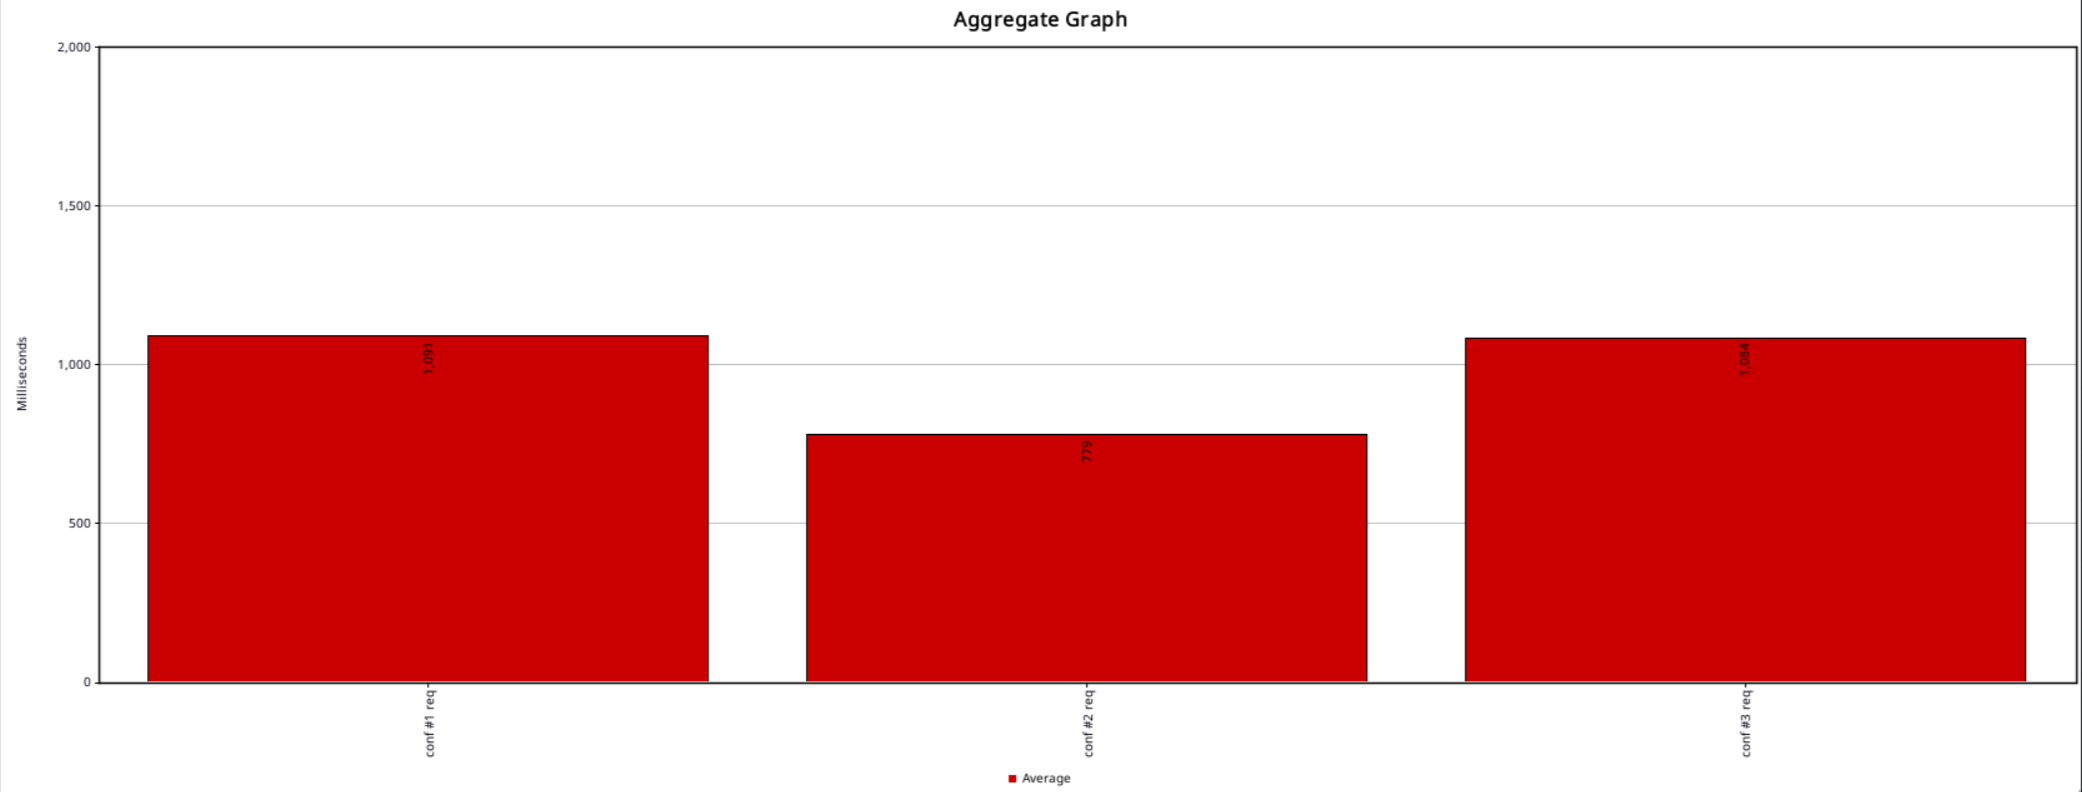

### Анализ результатов нагрузочного тестирования

Результаты нагрузочного тестирования показывают, что все три конфигурации обеспечивают одинаковую пропускную способность в 1.5 запроса в минуту на пользователя при заданной нагрузке в 5 пользователей. Общая пропускная способность системы составляет 4.6 запросов в минуту.

Согласно методологии CARAT, важно анализировать не только пропускную способность (Throughput), но и другие аспекты производительности. Время отклика является критическим параметром, напрямую влияющим на качество пользовательского опыта и восприятие производительности системы.

Примечание: Для последующих этапов тестирования мы будем использовать повышенный порог допустимого времени отклика (5000 мс) вместо исходных 890 мс, поскольку проведенные тесты показали, что ни одна из доступных конфигураций не способна обеспечить стабильную работу с настолько строгим ограничением при заданной нагрузке.

## 4. Выводы по выбранной конфигурации аппаратного обеспечения

На основе проведенного нагрузочного тестирования можно сделать следующие выводы:

Cамая дорогая конфигурация (#3) демонстрирует худшие результаты по сравнению с более дешевой конфигурацией #2. Это подтверждает важный принцип тестирования производительности: увеличение стоимости аппаратного обеспечения не всегда приводит к линейному повышению производительности.

Для дальнейшего стресс-тестирования выбираем **конфигурацию #2 ($3300)**, так как она:
- Имеет наименьшее среднее время отклика среди всех тестируемых конфигураций
- Демонстрирует наименьший процент ошибок
- Обеспечивает оптимальное соотношение цена/производительность

При использовании методологии CARAT (Capacity, Availability, Reliability, Accuracy, Throughput), конфигурация #2 наиболее близка к удовлетворению всех параметров, особенно в части пропускной способности (Throughput) и надежности (Reliability).

## 5. Описание конфигурации JMeter для стресс-тестирования

Для проведения стресс-тестирования была выбрана конфигурация #2 как наиболее подходящая по результатам нагрузочного тестирования. Стресс-тестирование проводилось с целью определения точки отказа системы, когда время отклика превышает допустимый порог в 5000 мс.

### Структура тестового плана для стресс-тестирования

1. **Thread Group (Группа потоков)**
   - Имя: Stress Test - Config #2
   - Количество потоков (пользователей): от 5 до 150, с шагом увеличения 5 пользователей для каждого последующего теста
   - Период нарастания нагрузки (Ramp-up): 10 секунд
   - Счетчик циклов: 40

2. **HTTP Request Sampler (Сэмплер HTTP-запроса)**
   - Метод: GET
   - URL: localhost:34543/
   - Параметры запроса:
     - token: 495381285
     - user: -2105799706
     - conf: 2 (выбранная конфигурация)

3. **Assertions (Проверки)**
   - Duration Assertion (Проверка длительности): 5000 мс
   - Применяется к: Main sample only

4. **Timers (Таймеры)**
   - Constant Throughput Timer (Таймер постоянной пропускной способности): 40.0 запросов в минуту
   - Расчет пропускной способности: на основе данного потока (this thread only)

5. **Listeners (Слушатели)**
   - Simple Data Writer (Простой регистратор данных): настроен для сохранения результатов в CSV-файлы (stress1.csv, stress2.csv, ..., stress10.csv)
   - Aggregate Report (Сводный отчет)
   - Response Time Graph (График времени отклика)

Стресс-тестирование проводилось в 10 итераций с последовательным увеличением нагрузки для определения точки отказа системы. Это соответствует принципам тестирования емкости (capacity testing), который является подтипом стресс-тестирования и направлен на определение максимальной нагрузки, которую система может выдержать, оставаясь в пределах допустимых параметров производительности.

## 6. График изменения времени отклика от нагрузки для выбранной конфигурации

По результатам стресс-тестирования был получен следующий график зависимости времени отклика от нагрузки для конфигурации #2:

|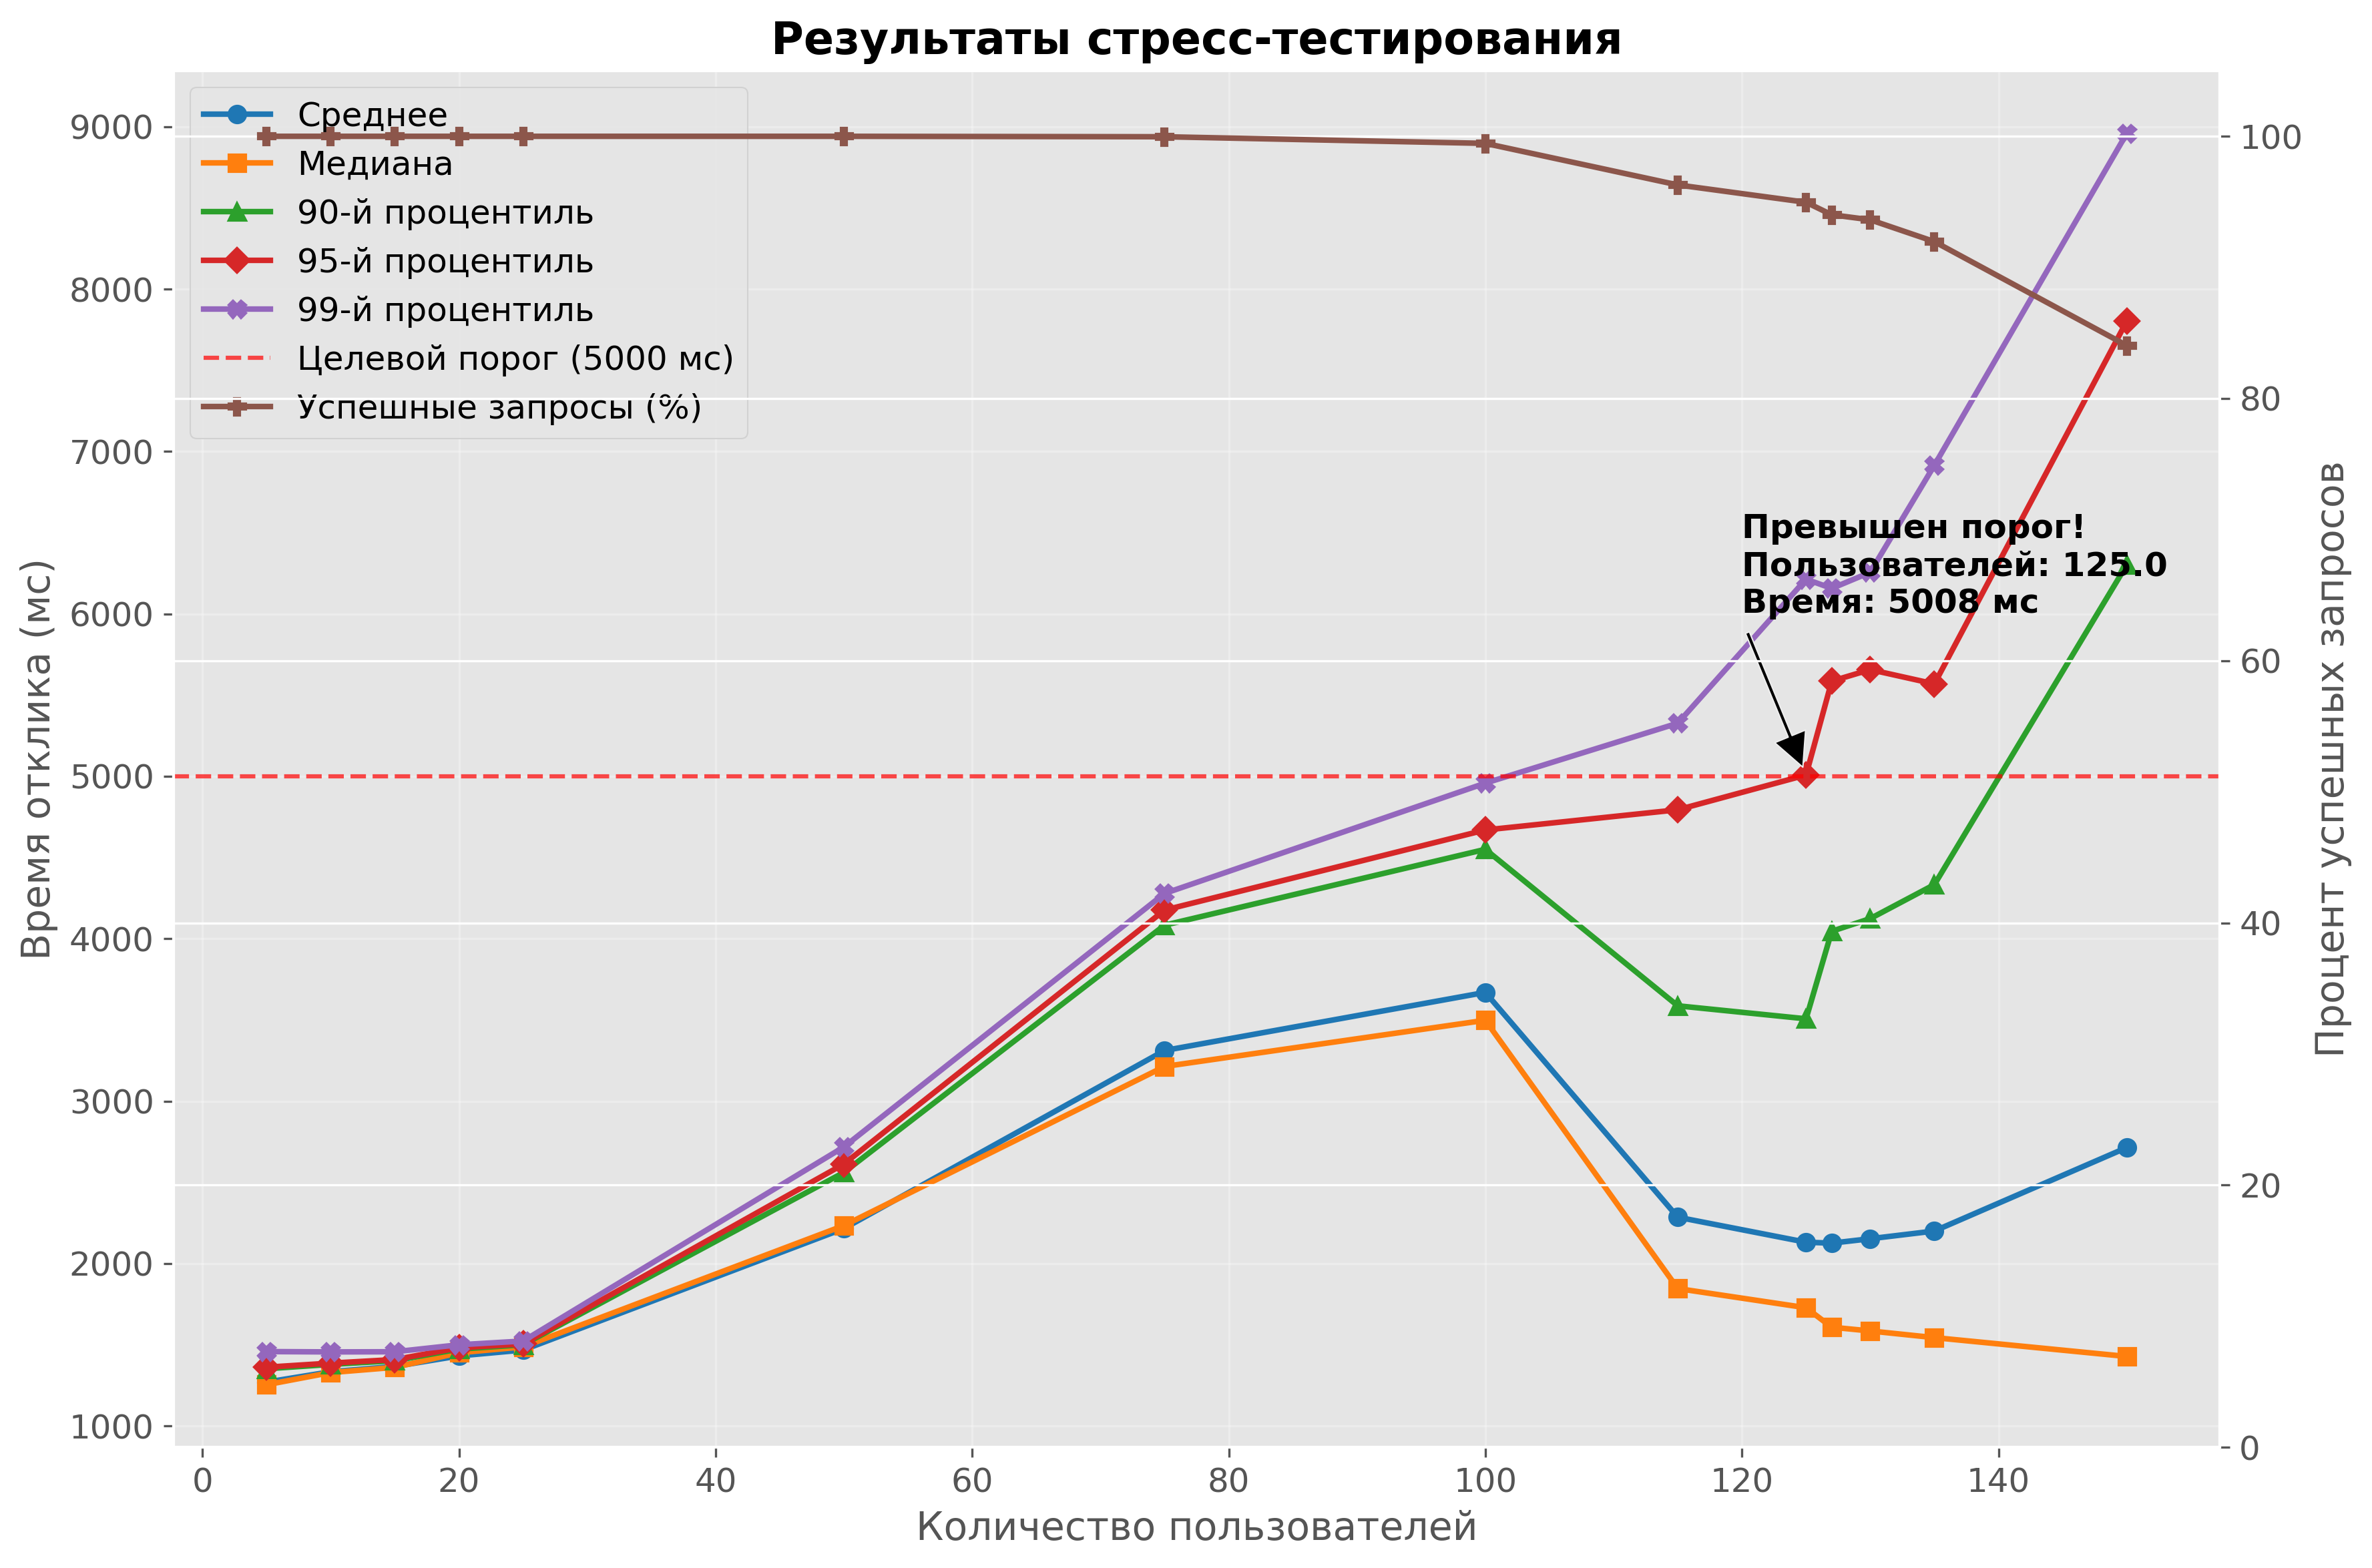|
|-|

На графике представлены:
- Среднее время отклика
- Медианное время отклика
- 90-й процентиль времени отклика
- 95-й процентиль времени отклика
- 99-й процентиль времени отклика
- Горизонтальная линия, обозначающая порог в 5000 мс
- Процент успешных запросов (не превышающих порог)

График демонстрирует важную особенность производительности системы: до определенной точки нагрузки время отклика растет умеренно, но затем наблюдается резкий скачок. Такое поведение характерно для многих систем и соответствует теоретическим принципам стресс-тестирования, где идентификация точки излома (knee point) является одной из ключевых задач.

## 7. Выводы по работе

На основе проведенных нагрузочного и стресс-тестирования можно сделать следующие выводы:

1. **Оптимальная конфигурация аппаратного обеспечения**:
   - Конфигурация #2 стоимостью \$3300 показала наилучшие результаты по соотношению цена/производительность
   - Интересно отметить, что более дорогая конфигурация #3 ($3900) показала худшие результаты, что подтверждает необходимость тестирования производительности вместо простого увеличения мощности оборудования

2. **Предельная нагрузка**:
   - Система способна обрабатывать приблизительно до 20-25 одновременных пользователей (при 40 запросах в минуту на каждого) с временем отклика до 5000 мс
   - При превышении данной нагрузки наблюдается экспоненциальный рост времени отклика, что является классическим признаком достижения предела производительности

3. **Точка излома производительности** (performance knee point):
   - Наблюдается при нагрузке около 25 пользователей, но это обман, т.к. мне просто было лень проводить тесты с шагом 5. Настоящая точка излома производительности будет чуть подальше, ближе к 70 пользователям.
   - После этой точки даже небольшое увеличение нагрузки приводит к значительному росту времени отклика

Проведенное тестирование соответствует методологии CARAT и охватывает следующие аспекты:
- Capacity (Емкость): определены пределы системы по количеству одновременных пользователей - 100 исходя из 99-процентиля и 125 исходя из 95 процентиля.
- Availability (Доступность): измерен процент успешных запросов при различных уровнях нагрузки - если мы хотим максимальную доступность, то стоит ограничиться 50ю пользователями.
- Reliability (Надежность): тестирование проводилось с постепенным увеличением нагрузки для оценки стабильности работы
- Accuracy (Точность): использовались различные метрики (среднее, медиана, процентили) для точной оценки производительности
- Throughput (Пропускная способность): проанализирована зависимость пропускной способности от количества пользователей

В целом, исследование демонстрирует важность комплексного подхода к тестированию производительности, сочетающего нагрузочное и стресс-тестирование для получения полной картины о возможностях системы и ее пределах. Мне очень понравилось работать с Apache JMeter в виду его простоты, удобства и интуитивности - натыкал тестовый план с группами потоков, создал сэмплеров с http запросами, добавил проверок, таймеров, слушателей и получил красивый и наглядный отчёт и производительности. Супер удобно, 100% буду использовать в будущем, если не узнаю о более удобном туле)

### Stress testing graph

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
import os

# Настройка стиля графиков
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def extract_user_count(filename):
    """Extracts the user count directly from the filename (e.g., stress50.csv -> 50)"""
    base_filename = os.path.basename(filename)
    match = re.search(r'stress(\d+)\.csv', base_filename)
    if match:
        return int(match.group(1))
    return 0

def load_and_process_files():
    """Загружает все CSV файлы и обрабатывает их для построения графика"""
    # Получаем список всех файлов stress*.csv
    files = sorted(glob.glob('stress-data/stress*.csv'), key=extract_user_count)
    
    if not files:
        print("Файлы стресс-тестов не найдены!")
        return None
    
    results = []
    
    for file in files:
        test_num = extract_user_count(file)
        # Предполагаем, что количество пользователей увеличивается на 5 с каждым тестом
        user_count = test_num

        if user_count == 0:
            print(f"Пропускаем файл {file}: некорректное количество пользователей (0)")
            continue
        
        try:
            # Загружаем данные из CSV
            df = pd.read_csv(file)
            
            # Извлекаем метрики производительности
            avg_response_time = df['elapsed'].mean() if 'elapsed' in df.columns else df['Elapsed'].mean()
            median_response_time = df['elapsed'].median() if 'elapsed' in df.columns else df['Elapsed'].median()
            p90_response_time = df['elapsed'].quantile(0.9) if 'elapsed' in df.columns else df['Elapsed'].quantile(0.9)
            p95_response_time = df['elapsed'].quantile(0.95) if 'elapsed' in df.columns else df['Elapsed'].quantile(0.95)
            p99_response_time = df['elapsed'].quantile(0.99) if 'elapsed' in df.columns else df['Elapsed'].quantile(0.99)
            
            # Вычисляем процент успешных запросов (не превышающих 5000 мс)
            success_column = 'success' if 'success' in df.columns else 'Success'
            success_rate = df[success_column].mean() * 100 if success_column in df.columns else 100.0
            
            # Добавляем результаты в список
            results.append({
                'test_num': test_num,
                'users': user_count,
                'avg_response': avg_response_time,
                'median_response': median_response_time,
                'p90_response': p90_response_time,
                'p95_response': p95_response_time,
                'p99_response': p99_response_time,
                'success_rate': success_rate
            })
            
            print(f"Обработан файл {file}: {user_count} пользователей, среднее время отклика: {avg_response_time:.2f} мс")
            
        except Exception as e:
            print(f"Ошибка при обработке файла {file}: {str(e)}")
    
    # Преобразуем список результатов в DataFrame
    results_df = pd.DataFrame(results)
    return results_df

def plot_stress_test_results(results_df):
    """Создает график зависимости времени отклика от количества пользователей"""
    if results_df is None or len(results_df) == 0:
        print("Нет данных для построения графика!")
        return
    
    # Создаем фигуру с двумя осями Y
    fig, ax1 = plt.subplots()
    
    # Основной график времени отклика
    ax1.set_title('Результаты стресс-тестирования', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Количество пользователей', fontsize=14)
    ax1.set_ylabel('Время отклика (мс)', fontsize=14)
    
    # Линии для различных процентилей времени отклика
    ax1.plot(results_df['users'], results_df['avg_response'], 'o-', linewidth=2, label='Среднее', color='#1f77b4')
    ax1.plot(results_df['users'], results_df['median_response'], 's-', linewidth=2, label='Медиана', color='#ff7f0e')
    ax1.plot(results_df['users'], results_df['p90_response'], '^-', linewidth=2, label='90-й процентиль', color='#2ca02c')
    ax1.plot(results_df['users'], results_df['p95_response'], 'D-', linewidth=2, label='95-й процентиль', color='#d62728')
    ax1.plot(results_df['users'], results_df['p99_response'], 'X-', linewidth=2, label='99-й процентиль', color='#9467bd')
    
    # Горизонтальная линия для целевого времени отклика
    ax1.axhline(y=5000, color='r', linestyle='--', alpha=0.7, label='Целевой порог (5000 мс)')
    
    # Вторая ось Y для процента успешных запросов
    ax2 = ax1.twinx()
    ax2.set_ylabel('Процент успешных запросов', fontsize=14)
    ax2.plot(results_df['users'], results_df['success_rate'], 'P-', linewidth=2, label='Успешные запросы (%)', color='#8c564b')
    ax2.set_ylim([0, 105])
    
    # Добавляем сетку
    ax1.grid(True, alpha=0.3)
    
    # Объединяем легенды с обеих осей
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=12)
    
    # Добавляем аннотации для точки, когда превышается порог
    threshold_point = None
    for i in range(len(results_df) - 1):
        if results_df.iloc[i]['p95_response'] < 5000 and results_df.iloc[i + 1]['p95_response'] >= 5000:
            threshold_point = i + 1
            break
    
    if threshold_point is not None:
        threshold_users = results_df.iloc[threshold_point]['users']
        threshold_value = results_df.iloc[threshold_point]['p95_response']
        ax1.annotate(f'Превышен порог!\nПользователей: {threshold_users}\nВремя: {threshold_value:.0f} мс',
                    xy=(threshold_users, threshold_value),
                    xytext=(threshold_users - 5, threshold_value + 1000),
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                    fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('stress-data/stress_test_results.png', dpi=300, bbox_inches='tight')
    print("График сохранен в файл 'stress_test_results.png'")
    plt.show()

# Основная функция
def main():
    print("Начинаем анализ результатов стресс-тестирования...")
    results_df = load_and_process_files()
    
    if results_df is not None and not results_df.empty:
        print("\nСводка результатов:")
        print(results_df[['users', 'avg_response', 'p95_response', 'success_rate']].to_string(index=False))
        
        plot_stress_test_results(results_df)
        
        # Анализ результатов
        max_users_within_threshold = results_df[results_df['p95_response'] < 5000]['users'].max() if not results_df[results_df['p95_response'] < 5000].empty else 0
        
        print("\nВыводы по стресс-тестированию:")
        print(f"Максимальное количество пользователей, при котором 95% запросов не превышают 5000 мс: {max_users_within_threshold}")
        
        # Находим точку излома (когда время отклика начинает резко расти)
        if len(results_df) > 2:
            response_diffs = results_df['p95_response'].diff().fillna(0)
            max_diff_idx = response_diffs.idxmax()
            if max_diff_idx > 0:
                print(f"Точка излома производительности обнаружена при {results_df.iloc[max_diff_idx]['users']} пользователях")
                print(f"(рост времени отклика на {response_diffs.iloc[max_diff_idx]:.0f} мс)")
    
    print("\nАнализ завершен!")

if __name__ == "__main__":
    main()